In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import time

import re
import nltk
from nltk.translate.bleu_score import corpus_bleu
import ast

In [3]:
ref = pd.read_csv('/content/gdrive/MyDrive/flickr8k_captions.txt', sep=",")
ref = ref.set_index('image')
ref['caption'] = ref['caption'].str.lower()
ref['caption'] = ref['caption'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
ref['caption'] = ref['caption'].apply(lambda x: x.split())
ref = ref.groupby('image')['caption'].agg(list).reset_index().set_index('image')

In [4]:
gen = pd.read_csv('/content/gdrive/MyDrive/flickr8k_generatedcaptions.csv').set_index('image')
gen['caption'] = gen['caption'].apply(lambda x: ast.literal_eval(x))

In [5]:
corpus_bleu(list(ref['caption']), list(gen['caption']))

0.27343965610071125

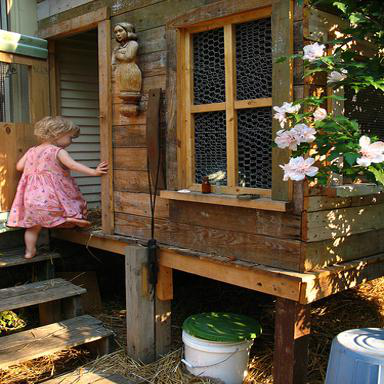

In [40]:
from PIL import Image
raw_image = Image.open('/content/gdrive/MyDrive/flickr8k_images/'+gen.index[0]).convert("RGB")
raw_image

In [41]:
ref.iloc[0]['caption']

[['a',
  'child',
  'in',
  'a',
  'pink',
  'dress',
  'is',
  'climbing',
  'up',
  'a',
  'set',
  'of',
  'stairs',
  'in',
  'an',
  'entry',
  'way'],
 ['a', 'girl', 'going', 'into', 'a', 'wooden', 'building'],
 ['a', 'little', 'girl', 'climbing', 'into', 'a', 'wooden', 'playhouse'],
 ['a',
  'little',
  'girl',
  'climbing',
  'the',
  'stairs',
  'to',
  'her',
  'playhouse'],
 ['a',
  'little',
  'girl',
  'in',
  'a',
  'pink',
  'dress',
  'going',
  'into',
  'a',
  'wooden',
  'cabin']]

In [42]:
gen.iloc[0]['caption']

['a',
 'little',
 'girl',
 'in',
 'a',
 'pink',
 'dress',
 'standing',
 'outside',
 'of',
 'a',
 'house']